In [1]:
import cv2 as cv2
from matplotlib import pyplot as plt
import os
import pandas as pd

In [2]:
data_path = "./debris-detection"

In [3]:
test_img_path = "2114.jpg"
img = cv2.imread(os.path.join(data_path, "test", test_img_path))


TypeError: Image data of dtype object cannot be converted to float

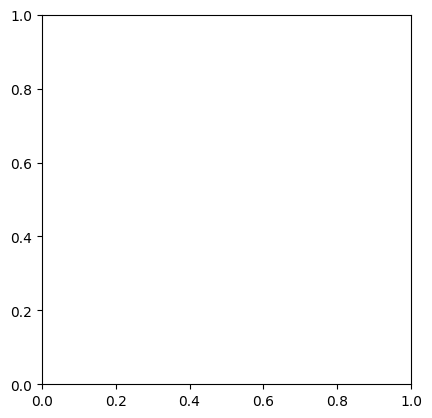

In [4]:
plt.imshow(img)

In [5]:
bboxes_csv = pd.read_csv("./submission.csv")
bboxes_csv

FileNotFoundError: [Errno 2] No such file or directory: './submission.csv'

In [51]:
bbox_row = bboxes_csv[bboxes_csv["ImageID"] == int(test_img_path.split(".")[0])]
bbox_row

,ImageID,bboxes
9,2114,"[[266.3701477050781, 106.15090942382812, 288.5..."


In [52]:
from ast import literal_eval


bboxes = literal_eval(bbox_row["bboxes"].iloc[0])
print(bboxes)

[[266.3701477050781, 106.15090942382812, 288.55908203125, 133.9706268310547, 0.9937699437141418], [75.18305206298828, 179.844970703125, 106.69654846191406, 208.29551696777344, 0.9839073419570923], [389.1406555175781, 355.5906982421875, 411.6618347167969, 388.7292785644531, 0.9825059175491333], [271.13134765625, 107.50855255126953, 305.56298828125, 133.98443603515625, 0.8665414452552795], [393.7742614746094, 359.99945068359375, 430.0242614746094, 388.43475341796875, 0.5475718975067139]]


In [53]:
for bbox in bboxes:
    x1, y1, x2, y2, prob = bbox
    x1, x2, y1, y2 = int(x1), int(x2), int(y1), int(y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"{prob:.2f}", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


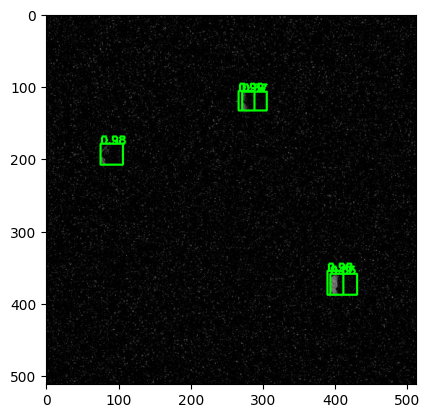

In [54]:
plt.imshow(img)